In [76]:
# Load Packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline             
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone
import shap


# Load Dataset

In [3]:

df = pd.read_csv("/mnt/c/Neuro_Parkinson/data/Cognition_Dataset/OnlyNormalized_volumes(CS).csv")

df = df[df["group"] != "PD-MCI"]
print(df)

    Unnamed: 0 Subjects    group  age  norm_Left-Lateral-Ventricle  \
2            2   MJF003  Control   68                  4451.086039   
3            3   MJF006  Control   75                 -4376.227124   
5            5   MJF008  Control   61                -11894.953700   
6            6   MJF009  Control   85                 -6893.368248   
8            8   MJF011    PD-NC   64                 -3747.548206   
10          10   MJF013    PD-NC   74                 10809.416897   
11          11   MJF014    PD-NC   60                -10273.472017   
12          12   MJF015    PD-NC   66                 -6600.658954   
14          14   MJF017    PD-NC   67                  2561.811831   
15          15   MJF019    PD-NC   65                 -2296.108301   
16          16   MJF020    PD-NC   69                 -3984.315538   
17          17   MJF024    PD-NC   64                  -850.430004   
20          20   MJF028    PD-NC   61                 -7558.721459   
21          21   MJF

In [5]:

# Binary label encoding
# Control -> 0, PD-NC  -> 1
df["label"] = df["group"].apply(lambda x: 0 if x == "Control" else 1)

# Drop non-feature columns
X = df.drop(columns=["Subjects", "group", "label"])
y = df["label"]

df

,Unnamed: 0,Subjects,group,age,norm_Left-Lateral-Ventricle,norm_Left-Inf-Lat-Vent,norm_Left-Cerebellum-White-Matter,norm_Left-Cerebellum-Cortex,norm_Left-Thalamus,norm_Left-Caudate,...,norm_CortexVol,norm_lhCerebralWhiteMatterVol,norm_rhCerebralWhiteMatterVol,norm_CerebralWhiteMatterVol,norm_SubCortGrayVol,norm_TotalGrayVol,norm_SupraTentorialVol,norm_SupraTentorialVolNotVent,norm_MaskVol,label
2,2,MJF003,Control,68,4451.086039,-110.986091,-1585.468866,-6701.598387,-250.741326,-16.839339,...,70795.178027,-366.636585,-1893.496144,-2260.132729,-513.222347,56778.667353,70568.335184,68160.775162,82118.757144,0
3,3,MJF006,Control,75,-4376.227124,-276.573053,-532.369353,5418.755337,-49.990439,-442.671950,...,-18408.179111,-14801.045268,-16798.352455,-31599.397723,-4251.582174,-12985.070492,-58740.665598,-54524.398156,-28666.906883,0
5,5,MJF008,Control,61,-11894.953700,-488.289234,3819.056585,3995.588455,922.816899,620.483218,...,26146.953800,21315.475830,23018.088204,44333.564033,8691.269520,41224.773462,54755.759220,79575.562190,63429.002590,0
6,6,MJF009,Control,85,-6893.368248,-294.847291,903.194414,5095.662179,304.735356,-107.660367,...,15235.760552,7758.589853,7897.698664,15656.288517,1608.483413,24976.345629,20572.189457,33344.681300,66607.898679,0
8,8,MJF011,PD-NC,64,-3747.548206,-289.905216,2610.804061,-955.598731,-1168.308458,-345.380478,...,-4598.471431,-7297.755578,-5760.016330,-13057.771907,-4490.138747,-8677.935397,-31191.511930,-21460.998847,-24755.250629,1
10,10,MJF013,PD-NC,74,10809.416897,557.822822,-1182.670422,-9939.512137,-703.782197,-125.891548,...,1033.434487,-16540.998926,-12376.088855,-28917.087781,-4474.979007,-24626.535594,-6443.767140,-32010.318832,658.317050,1
11,11,MJF014,PD-NC,60,-10273.472017,-355.700825,-2880.080945,874.168681,749.937118,-388.837379,...,13878.452618,2034.299457,888.743787,2923.043245,2967.791012,16893.547599,-4612.688028,19570.086634,34141.879732,1
12,12,MJF015,PD-NC,66,-6600.658954,-185.431906,233.398030,-1712.054000,321.553245,-78.500613,...,25171.654520,24837.850284,22150.319299,46988.169584,2007.855323,20875.774960,59631.318852,74553.211309,54782.822003,1
14,14,MJF017,PD-NC,67,2561.811831,-293.447702,-1486.837136,4718.196513,-162.454637,-521.181597,...,6319.714209,-20661.896572,-14235.093925,-34896.990497,-3412.652010,11429.328217,-30773.312947,-32105.102042,-30374.120884,1
15,15,MJF019,PD-NC,65,-2296.108301,-140.786390,26.076900,9429.770675,-47.900204,353.448144,...,-4828.504956,7115.147617,9000.116734,16115.264351,1953.333870,12128.634693,3646.963393,13074.360203,17746.748044,1


In [6]:
# Check the number of Healthy and PD-NC(Parkinson's with normal cognition)
df["group"].value_counts()

group
Control    22
PD-NC      18
Name: count, dtype: int64

# Feature Selection

In [8]:
# Drop non-feature columns
X = df.drop(columns=['Subjects','Unnamed: 0','group','label'])
y = df["label"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)


In [10]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("selector", SelectKBest(score_func=f_classif, k=10)),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

pipe.fit(X_train, y_train)


/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [35 36 37 38 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,steps,"[('scaler', ...), ('selector', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,score_func,<function f_c...x7459d42f0dc0>
,k,10
,penalty,'l2'
,dual,False


In [11]:
selected_features_LR = X.columns[pipe.named_steps["selector"].get_support()]
print(selected_features_LR)


Index(['age', 'norm_CSF', 'norm_Right-Thalamus', 'norm_Right-vessel',
       'norm_CC_Anterior', 'norm_BrainSegVol', 'norm_BrainSegVolNotVent',
       'norm_lhCerebralWhiteMatterVol', 'norm_rhCerebralWhiteMatterVol',
       'norm_CerebralWhiteMatterVol'],
      dtype='object')


In [12]:
## Embedded methods (L1-regularized Logistic Regression)
pipe_l1 = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        penalty="l1",
        solver="liblinear",
        class_weight="balanced",
        max_iter=1000
    ))
])

pipe_l1.fit(X_train, y_train)


,steps,"[('scaler', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0


In [13]:
coef = pipe_l1.named_steps["clf"].coef_[0]
selected_features_LASSO = X.columns[coef != 0]

print("Selected features:", selected_features_LASSO)


Selected features: Index(['age', 'norm_Left-Cerebellum-Cortex', 'norm_4th-Ventricle',
       'norm_Brain-Stem', 'norm_CSF', 'norm_Left-Accumbens-area',
       'norm_Right-Inf-Lat-Vent', 'norm_Right-Thalamus', 'norm_Right-vessel',
       'norm_5th-Ventricle', 'norm_Optic-Chiasm', 'norm_CC_Mid_Anterior',
       'norm_CC_Anterior', 'norm_BrainSegVol',
       'norm_rhCerebralWhiteMatterVol'],
      dtype='object')


In [14]:
# Tree-based feature importance (Random Forest / GB)

rf = RandomForestClassifier(
    n_estimators=500,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
SELECTED_FEATURES_RF = importances.sort_values(ascending=False).head(10)
SELECTED_FEATURES_RF

norm_CSF                         0.041806
norm_SubCortGrayVol              0.038004
norm_CC_Anterior                 0.034902
norm_SupraTentorialVolNotVent    0.031585
norm_Right-vessel                0.031295
norm_CC_Mid_Anterior             0.031288
norm_SupraTentorialVol           0.026801
norm_CC_Posterior                0.026612
norm_MaskVol                     0.026171
norm_5th-Ventricle               0.025370
dtype: float64

In [15]:
# Wrapper methods (gold standard, but expensive)

from sklearn.feature_selection import RFE

rfe = RFE(
    estimator=LogisticRegression(
        class_weight="balanced",
        max_iter=500
    ),
    n_features_to_select=10
)

rfe.fit(X_train, y_train)

selected_features_RFE = X.columns[rfe.support_]
print(selected_features_RFE)


/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

Index(['norm_Left-Thalamus', 'norm_Left-Caudate', 'norm_Left-Putamen',
       'norm_Brain-Stem', 'norm_Left-Hippocampus', 'norm_CSF',
       'norm_Right-Thalamus', 'norm_Right-Caudate', 'norm_CC_Mid_Anterior',
       'norm_CC_Anterior'],
      dtype='object')


/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

In [16]:

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("selector", SelectKBest(f_classif, k=10)),
    ("clf", SVC(kernel="rbf", probability=True, class_weight="balanced"))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    pipe,
    X,
    y,
    cv=cv,
    scoring="roc_auc"
)

print("Mean ROC-AUC:", scores.mean())


/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [35 36 37 38 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [35 36 37 38 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [35 36 37 38 39] 

Mean ROC-AUC: 0.5933333333333334


In [17]:
selected_features_rfe = selected_features_RFE.tolist()
selected_features_lasso = selected_features_LASSO.tolist()
selected_features_lr = selected_features_LR.tolist()
selected_features_rf = SELECTED_FEATURES_RF.index.tolist()


type(selected_features_rfe), type(selected_features_lasso), type(selected_features_lr), type(selected_features_rf)

final_selected_features = selected_features_rfe + selected_features_lasso + selected_features_lr + selected_features_rf 
final_selected_features = set(final_selected_features)
# final_selected_features.remove("Unnamed: 0")

final_selected_features

{'age',
 'norm_4th-Ventricle',
 'norm_5th-Ventricle',
 'norm_Brain-Stem',
 'norm_BrainSegVol',
 'norm_BrainSegVolNotVent',
 'norm_CC_Anterior',
 'norm_CC_Mid_Anterior',
 'norm_CC_Posterior',
 'norm_CSF',
 'norm_CerebralWhiteMatterVol',
 'norm_Left-Accumbens-area',
 'norm_Left-Caudate',
 'norm_Left-Cerebellum-Cortex',
 'norm_Left-Hippocampus',
 'norm_Left-Putamen',
 'norm_Left-Thalamus',
 'norm_MaskVol',
 'norm_Optic-Chiasm',
 'norm_Right-Caudate',
 'norm_Right-Inf-Lat-Vent',
 'norm_Right-Thalamus',
 'norm_Right-vessel',
 'norm_SubCortGrayVol',
 'norm_SupraTentorialVol',
 'norm_SupraTentorialVolNotVent',
 'norm_lhCerebralWhiteMatterVol',
 'norm_rhCerebralWhiteMatterVol'}

In [18]:
df_list = df.columns.values.tolist()
len(df_list)
drop_features = set(df_list) - set(final_selected_features)
drop_features.remove("Unnamed: 0")
len(drop_features), len(final_selected_features), len(df_list)

(34, 28, 63)

In [19]:
drop_features

{'Subjects',
 'group',
 'label',
 'norm_3rd-Ventricle',
 'norm_CC_Central',
 'norm_CC_Mid_Posterior',
 'norm_CortexVol',
 'norm_Left-Amygdala',
 'norm_Left-Cerebellum-White-Matter',
 'norm_Left-Inf-Lat-Vent',
 'norm_Left-Lateral-Ventricle',
 'norm_Left-Pallidum',
 'norm_Left-VentralDC',
 'norm_Left-WM-hypointensities',
 'norm_Left-choroid-plexus',
 'norm_Left-non-WM-hypointensities',
 'norm_Left-vessel',
 'norm_Right-Accumbens-area',
 'norm_Right-Amygdala',
 'norm_Right-Cerebellum-Cortex',
 'norm_Right-Cerebellum-White-Matter',
 'norm_Right-Hippocampus',
 'norm_Right-Lateral-Ventricle',
 'norm_Right-Pallidum',
 'norm_Right-Putamen',
 'norm_Right-VentralDC',
 'norm_Right-WM-hypointensities',
 'norm_Right-choroid-plexus',
 'norm_Right-non-WM-hypointensities',
 'norm_TotalGrayVol',
 'norm_WM-hypointensities',
 'norm_lhCortexVol',
 'norm_non-WM-hypointensities',
 'norm_rhCortexVol'}

# Training with the classification  model

In [20]:
# Drop the columns not in drop_features list
X = df.drop(columns=['Subjects','Unnamed: 0','group','label','norm_3rd-Ventricle', 'norm_CC_Central', 'norm_CC_Mid_Posterior',
                     'norm_CortexVol', 'norm_Left-Amygdala', 'norm_Left-Cerebellum-White-Matter', 'norm_Left-Inf-Lat-Vent', 
                     'norm_Left-Lateral-Ventricle', 'norm_Left-Pallidum', 'norm_Left-VentralDC', 'norm_Left-WM-hypointensities', 
                     'norm_Left-choroid-plexus', 'norm_Left-non-WM-hypointensities', 'norm_Left-vessel', 'norm_Right-Accumbens-area', 
                     'norm_Right-Amygdala', 'norm_Right-Cerebellum-Cortex', 'norm_Right-Cerebellum-White-Matter', 'norm_Right-Hippocampus',
                     'norm_Right-Lateral-Ventricle', 'norm_Right-Pallidum', 'norm_Right-Putamen', 'norm_Right-VentralDC', 
                     'norm_Right-WM-hypointensities', 'norm_Right-choroid-plexus', 'norm_Right-non-WM-hypointensities', 'norm_TotalGrayVol', 
                     'norm_WM-hypointensities', 'norm_lhCortexVol', 'norm_non-WM-hypointensities', 'norm_rhCortexVol'])
y = df["label"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)


In [23]:
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
    ]),

    "SVM (RBF)": Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", probability=True, class_weight="balanced"))
    ]),

    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        class_weight="balanced",
        random_state=42
    ),

    "Decision Tree": DecisionTreeClassifier(
        class_weight="balanced",
        random_state=42
    ),

    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=200,
        random_state=42
    ),

    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=5))
    ]),

    "Bagging": BaggingClassifier(
        n_estimators=100,
        random_state=42
    )
}


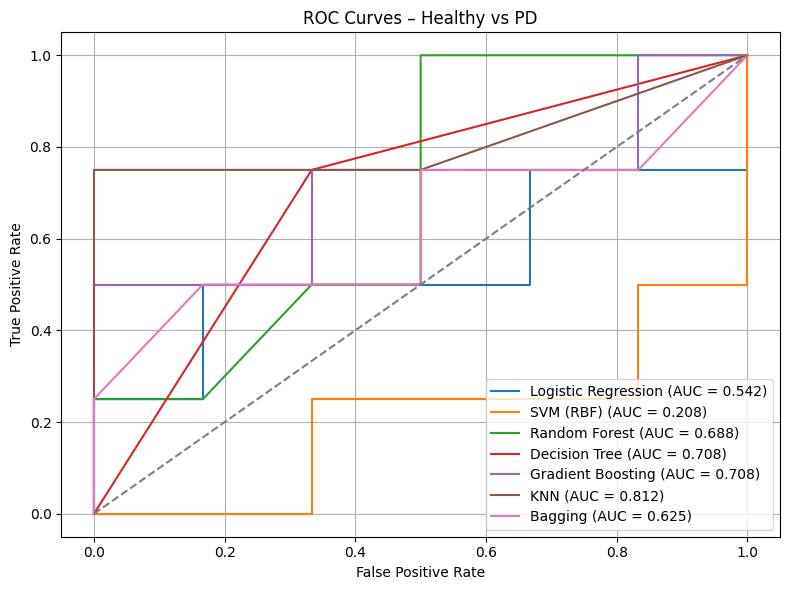

In [25]:
results = []

plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    results.append({
    "Model": name,
    "Accuracy": accuracy_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_prob),
    "F1-score": f1_score(y_test, y_pred)
    })

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")


results_df = pd.DataFrame(results)

# Chance line
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Healthy vs PD")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


Voting Classifier Results
Accuracy: 0.6
ROC-AUC: 0.6666666666666667
F1-score: 0.3333333333333333


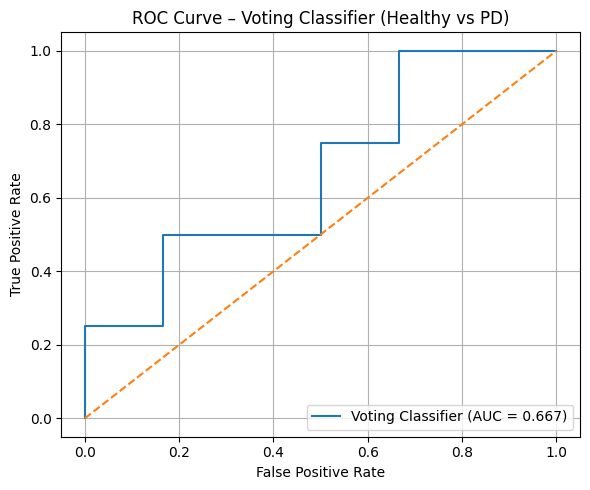

In [26]:
voting_clf = VotingClassifier(
    estimators=[
        ("lr", models["Logistic Regression"]),
        ("rf", models["Random Forest"]),
        ("svm", models["SVM (RBF)"])
    ],
    voting="soft"
)

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)
y_prob = voting_clf.predict_proba(X_test)[:, 1]

print("Voting Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("F1-score:", f1_score(y_test, y_pred))

# Get ROC values
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Voting Classifier (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Voting Classifier (Healthy vs PD)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


Model: Logistic Regression


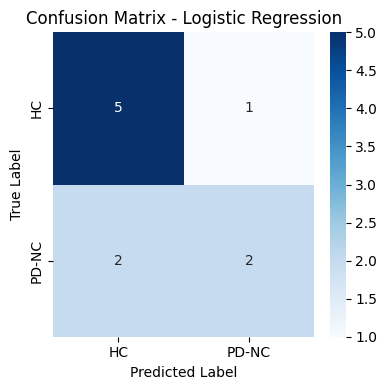


Classification Report - Logistic Regression
              precision    recall  f1-score   support

          HC       0.71      0.83      0.77         6
       PD-NC       0.67      0.50      0.57         4

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10

Model: SVM (RBF)


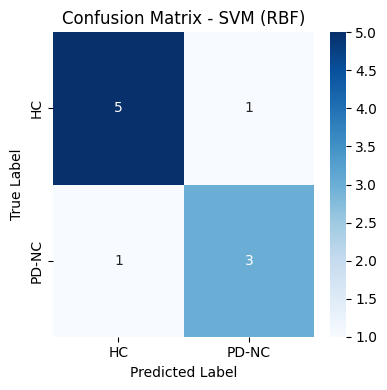


Classification Report - SVM (RBF)
              precision    recall  f1-score   support

          HC       0.83      0.83      0.83         6
       PD-NC       0.75      0.75      0.75         4

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10

Model: Random Forest


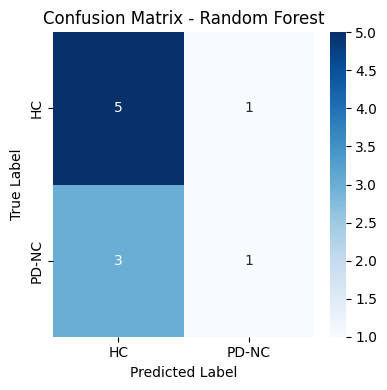


Classification Report - Random Forest
              precision    recall  f1-score   support

          HC       0.62      0.83      0.71         6
       PD-NC       0.50      0.25      0.33         4

    accuracy                           0.60        10
   macro avg       0.56      0.54      0.52        10
weighted avg       0.57      0.60      0.56        10

Model: Decision Tree


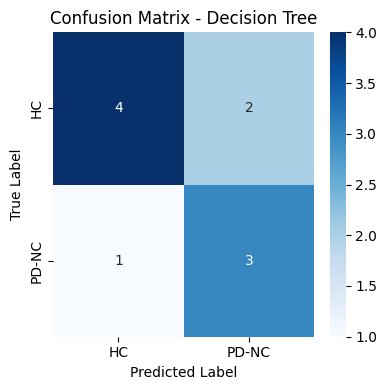


Classification Report - Decision Tree
              precision    recall  f1-score   support

          HC       0.80      0.67      0.73         6
       PD-NC       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10

Model: Gradient Boosting


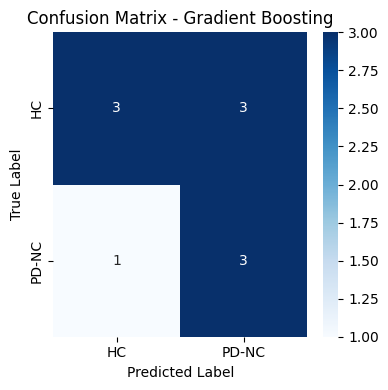


Classification Report - Gradient Boosting
              precision    recall  f1-score   support

          HC       0.75      0.50      0.60         6
       PD-NC       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10

Model: KNN


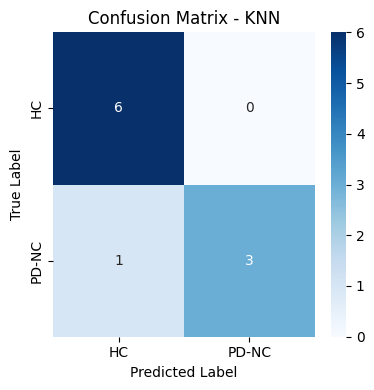


Classification Report - KNN
              precision    recall  f1-score   support

          HC       0.86      1.00      0.92         6
       PD-NC       1.00      0.75      0.86         4

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

Model: Bagging


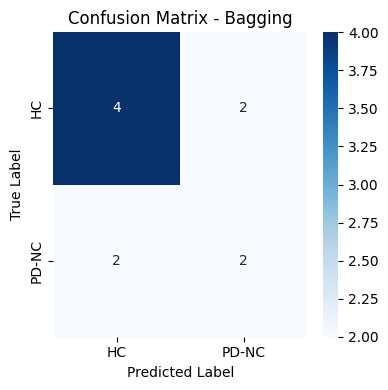


Classification Report - Bagging
              precision    recall  f1-score   support

          HC       0.67      0.67      0.67         6
       PD-NC       0.50      0.50      0.50         4

    accuracy                           0.60        10
   macro avg       0.58      0.58      0.58        10
weighted avg       0.60      0.60      0.60        10



In [27]:
def evaluate_model(model, model_name, X_test, y_test):
    """
    Prints confusion matrix and classification report
    """
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["HC", "PD-NC"],
        yticklabels=["HC", "PD-NC"]
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

    # Classification Report
    print(f"\nClassification Report - {model_name}")
    print(classification_report(
        y_test,
        y_pred,
        target_names=["HC", "PD-NC"]
    ))

for name, model in models.items():
    print("=" * 60)
    print(f"Model: {name}")

    model.fit(X_train, y_train)
    evaluate_model(model, name, X_test, y_test)


# Stratified Cross Vlidation on the model

Mean AUC score : 0.7591666666666667


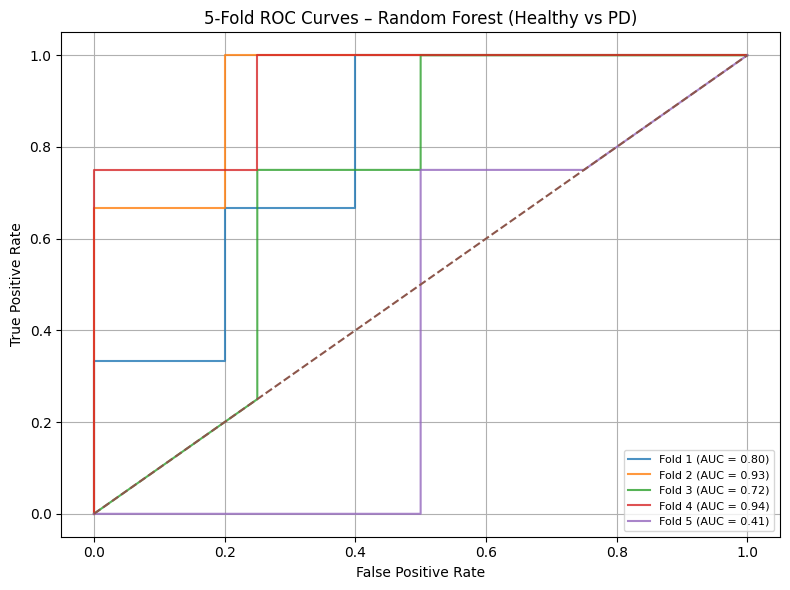

In [30]:
# Random  Forest

plt.figure(figsize=(8, 6))

aucs_RF = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # Clone the model to avoid data leakage
    model = models["Random Forest"]
    model.fit(X_train_cv, y_train_cv)

    y_prob = model.predict_proba(X_test_cv)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_cv, y_prob)
    auc = roc_auc_score(y_test_cv, y_prob)
    aucs_RF.append(auc)

    plt.plot(
        fpr,
        tpr,
        lw=1.5,
        alpha=0.8,
        label=f"Fold {fold} (AUC = {auc:.2f})"
    )

print("Mean AUC score :", np.mean(aucs_RF))
# Chance line
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("5-Fold ROC Curves – Random Forest (Healthy vs PD)")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


Mean AUC score : 0.4


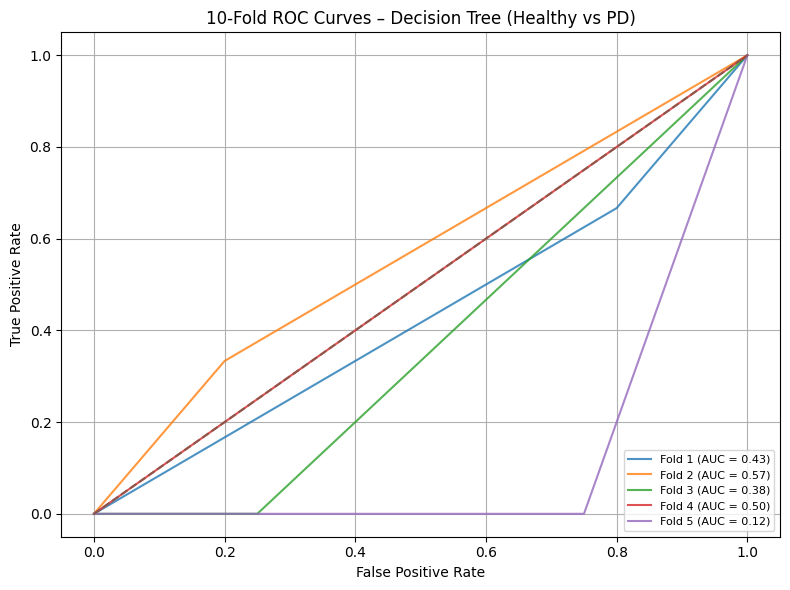

In [32]:
# Decision Tree

plt.figure(figsize=(8, 6))

aucs_DT = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # Clone the model to avoid data leakage
    model = models["Decision Tree"]
    model.fit(X_train_cv, y_train_cv)

    y_prob = model.predict_proba(X_test_cv)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_cv, y_prob)
    auc = roc_auc_score(y_test_cv, y_prob)
    aucs_DT.append(auc)

    plt.plot(
        fpr,
        tpr,
        lw=1.5,
        alpha=0.8,
        label=f"Fold {fold} (AUC = {auc:.2f})"
    )

print("Mean AUC score :", np.mean(aucs_DT))# Chance line
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("10-Fold ROC Curves – Decision Tree (Healthy vs PD)")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


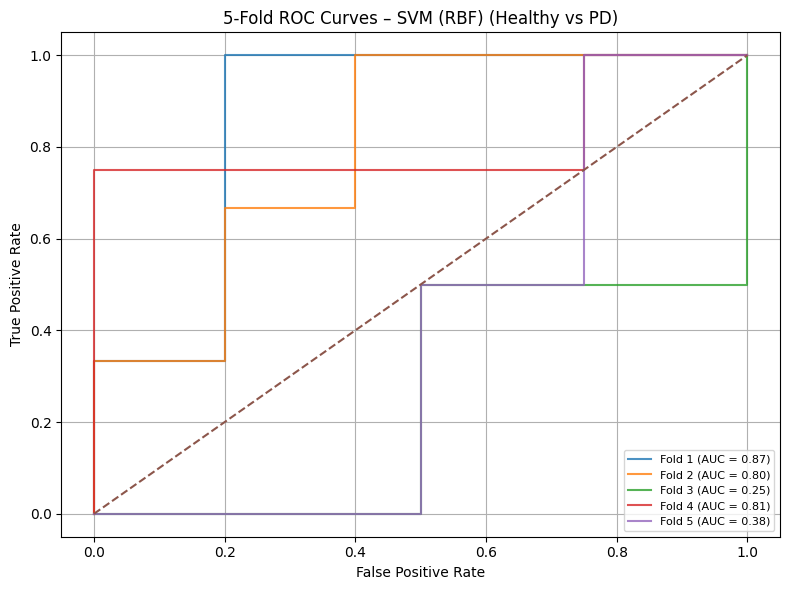

In [43]:
plt.figure(figsize=(8, 6))

aucs_SVM = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # Clone the model to avoid data leakage
    model = models["SVM (RBF)"]
    model.fit(X_train_cv, y_train_cv)

    y_prob = model.predict_proba(X_test_cv)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_cv, y_prob)
    auc = roc_auc_score(y_test_cv, y_prob)
    aucs_SVM.append(auc)

    plt.plot(
        fpr,
        tpr,
        lw=1.5,
        alpha=0.8,
        label=f"Fold {fold} (AUC = {auc:.2f})"
    )

# Chance line
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("5-Fold ROC Curves – SVM (RBF) (Healthy vs PD)")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
print("Mean AUC score :", np.mean(aucs_SVM))# Chance line

Mean AUC score : 0.6208333333333333


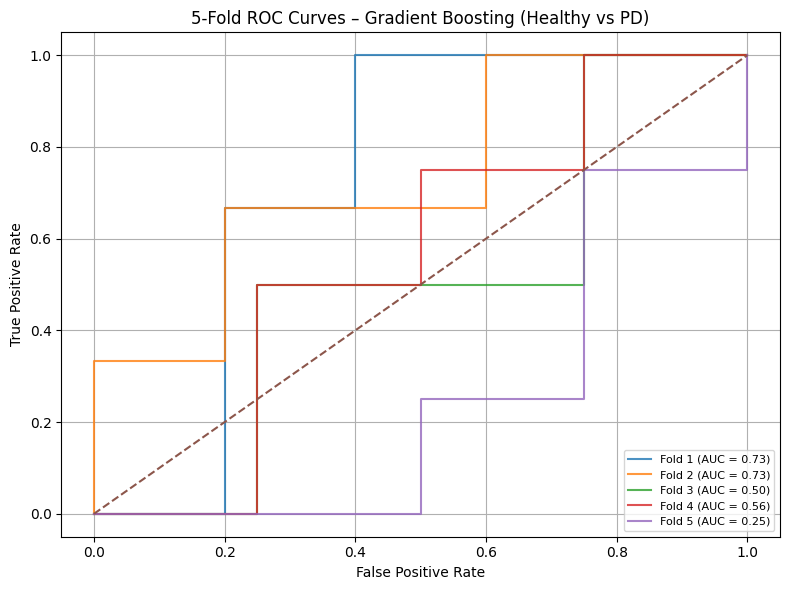

In [45]:
# Gradient Boosting

plt.figure(figsize=(8, 6))

aucs_GB = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    model = models["Gradient Boosting"]
    model.fit(X_train_cv, y_train_cv)

    y_prob = model.predict_proba(X_test_cv)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_cv, y_prob)
    auc = roc_auc_score(y_test_cv, y_prob)
    aucs_GB.append(auc)

    plt.plot(
        fpr,
        tpr,
        lw=1.5,
        alpha=0.8,
        label=f"Fold {fold} (AUC = {auc:.2f})"
    )

# Chance line
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("5-Fold ROC Curves – Gradient Boosting (Healthy vs PD)")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
print("Mean AUC score :", np.mean(aucs_GB))# Chance line

Mean AUC score : 0.5558333333333334


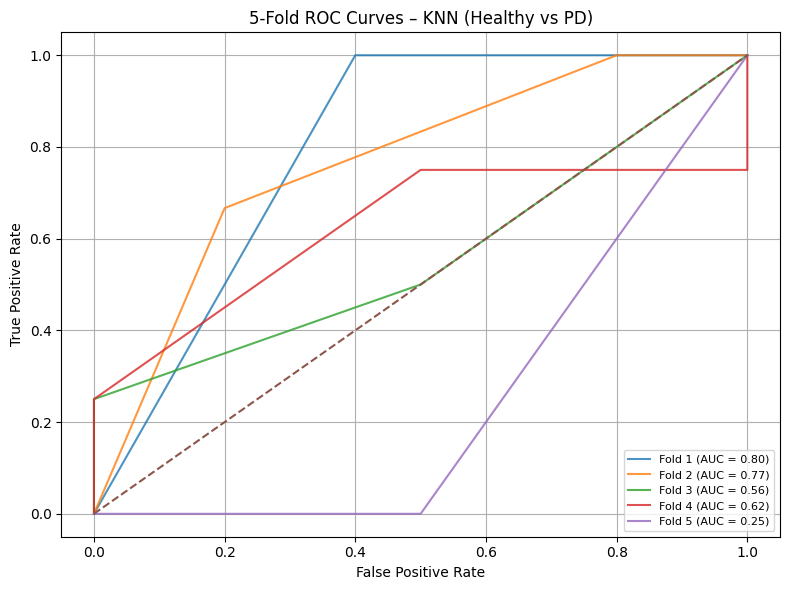

In [47]:
plt.figure(figsize=(8, 6))

aucs_knn = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # Clone the model to avoid data leakage
    model = models["KNN"]
    model.fit(X_train_cv, y_train_cv)

    y_prob = model.predict_proba(X_test_cv)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_cv, y_prob)
    auc = roc_auc_score(y_test_cv, y_prob)
    aucs_knn.append(auc)

    plt.plot(
        fpr,
        tpr,
        lw=1.5,
        alpha=0.8,
        label=f"Fold {fold} (AUC = {auc:.2f})"
    )

# Chance line
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("5-Fold ROC Curves – KNN (Healthy vs PD)")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
print("Mean AUC score :", np.mean(aucs_knn))# Chance line

Mean AUC score : 0.6008333333333333


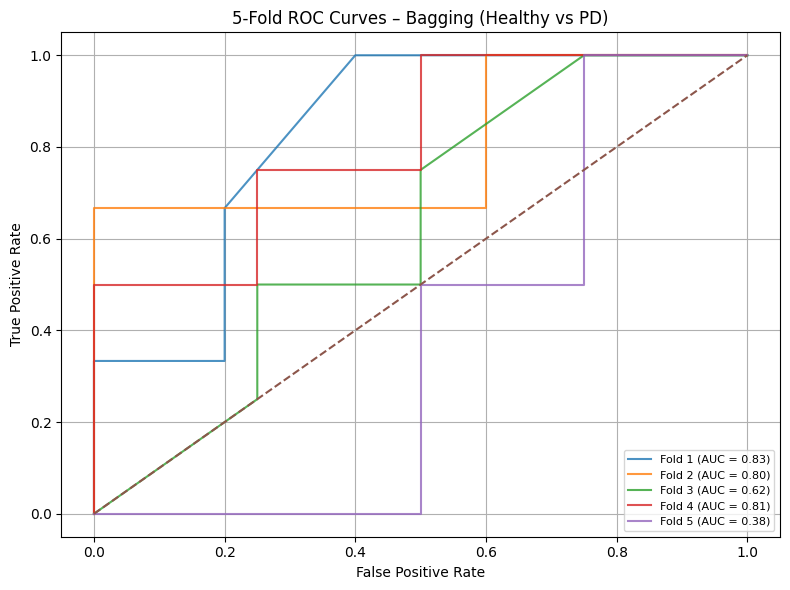

In [49]:
# Bagging

plt.figure(figsize=(8, 6))

aucs_bagging = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # Clone the model to avoid data leakage
    model = models["Bagging"]
    model.fit(X_train_cv, y_train_cv)

    y_prob = model.predict_proba(X_test_cv)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_cv, y_prob)
    auc = roc_auc_score(y_test_cv, y_prob)
    aucs_bagging.append(auc)

    plt.plot(
        fpr,
        tpr,
        lw=1.5,
        alpha=0.8,
        label=f"Fold {fold} (AUC = {auc:.2f})"
    )

# Chance line
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("5-Fold ROC Curves – Bagging (Healthy vs PD)")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
print("Mean AUC score :", np.mean(aucs_bagging))# Chance line

Mean AUC score : 0.6891666666666667


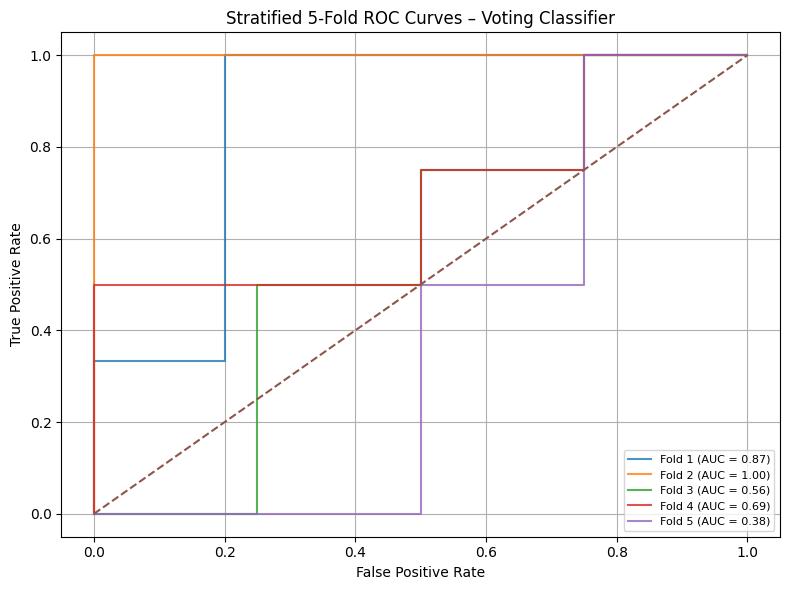

In [51]:
# Voting Classifier

plt.figure(figsize=(8, 6))

aucs = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # IMPORTANT: clone to avoid information leakage
    model = clone(voting_clf)
    model.fit(X_train_cv, y_train_cv)

    y_prob = model.predict_proba(X_test_cv)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_cv, y_prob)
    auc = roc_auc_score(y_test_cv, y_prob)
    aucs.append(auc)

    plt.plot(
        fpr,
        tpr,
        lw=1.5,
        alpha=0.8,
        label=f"Fold {fold} (AUC = {auc:.2f})"
    )

# Chance line
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Stratified 5-Fold ROC Curves – Voting Classifier")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
print("Mean AUC score :", np.mean(aucs))# Chance line

Mean AUC score : 0.6983333333333334


# Tune the models with nested cross-validation and SHAP for feature importance


Fold 1


100%|███████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 97.39it/s]



Fold 2


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 112.97it/s]



Fold 3


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 127.56it/s]



Fold 4


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 122.65it/s]



Fold 5


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 121.87it/s]


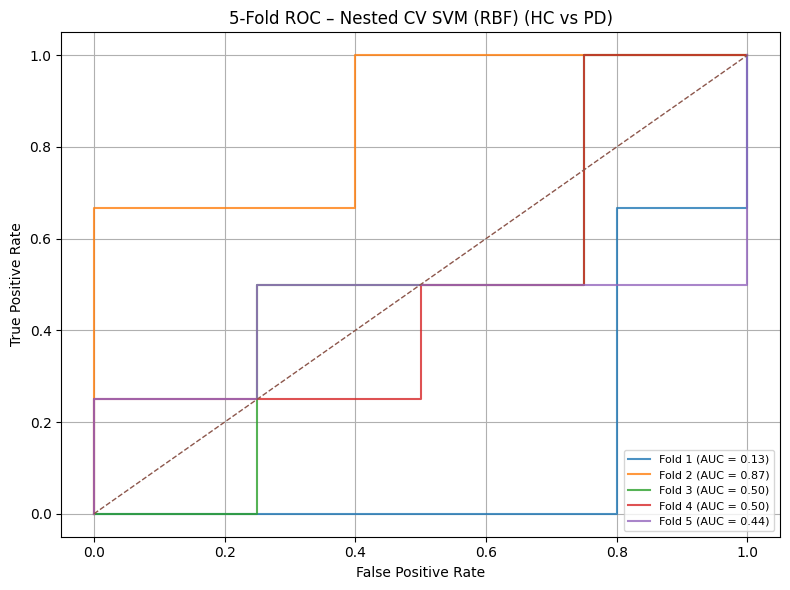

SVM Mean AUC: 0.487 ± 0.233


In [53]:
                                                        #########  SVM  #######

pipe_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(
        kernel="rbf",
        probability=True,   # REQUIRED for SHAP
        class_weight="balanced",
        random_state=42
    ))
])

plt.figure(figsize=(8, 6))

aucs = []

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {
    "clf__C": [0.1, 1, 10, 100],
    "clf__gamma": ["scale", 0.01, 0.1, 1]
}

# 🔹 SHAP storage
shap_values_per_fold_svm = []
X_train_per_fold_svm = []

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    print(f"\nFold {fold}")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    grid = GridSearchCV(
        estimator=pipe_svm,
        param_grid=param_grid,
        cv=inner_cv,
        scoring="roc_auc",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    # ------------------
    # ROC evaluation
    # ------------------
    y_prob = best_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    aucs.append(auc)

    fpr, tpr, _ = roc_curve(y_test, y_prob)

    plt.plot(
        fpr, tpr,
        lw=1.5,
        alpha=0.8,
        label=f"Fold {fold} (AUC = {auc:.2f})"
    )

    # ------------------
    # SHAP (KernelExplainer)
    # ------------------

    # Scale training data exactly as model sees it
    X_train_scaled = best_model.named_steps["scaler"].transform(X_train)

    # Background sample (VERY IMPORTANT for Kernel SHAP)
    background = shap.sample(X_train_scaled, 50, random_state=42)

    explainer = shap.KernelExplainer(
        best_model.named_steps["clf"].predict_proba,
        background
    )

    # Explain only class 1 (PD)
    shap_vals = explainer.shap_values(X_train_scaled, nsamples=100)

    shap_values_per_fold_svm.append(shap_vals[1])
    X_train_per_fold_svm.append(X_train_scaled)


plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("5-Fold ROC – Nested CV SVM (RBF) (HC vs PD)")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"SVM Mean AUC: {np.mean(aucs):.3f} ± {np.std(aucs):.3f}")


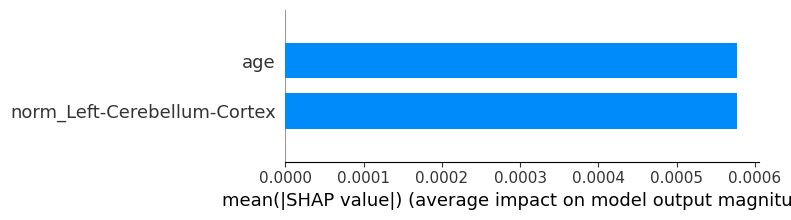

In [55]:
fold_id=0

shap.summary_plot(
    shap_values_per_fold_svm[fold_id],
    features=None,
    feature_names=X.columns,
    plot_type="bar",
    max_display=20,
    show=True
)


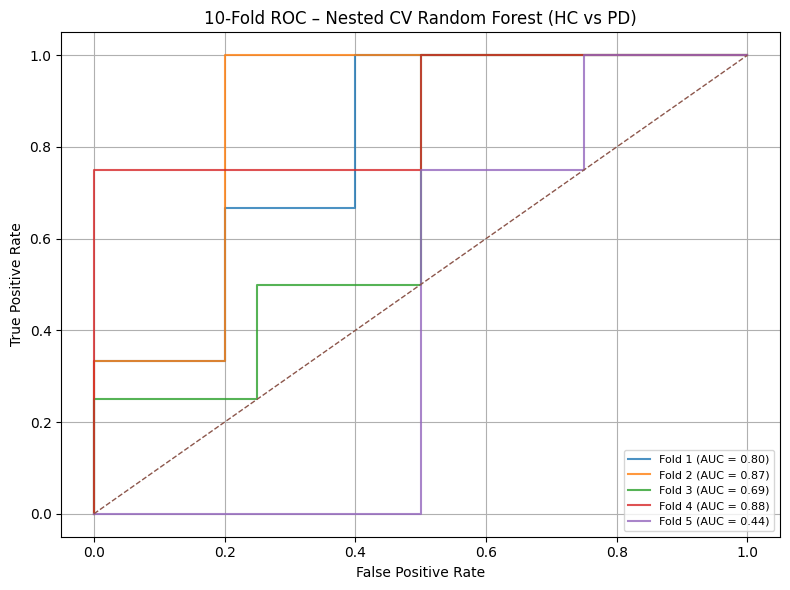

Random Forest Mean AUC: 0.733 ± 0.162


In [56]:
                                                 ###########  Random  Forest ###############

plt.figure(figsize=(8, 6))

aucs_rf = []

# Outer CV → model evaluation
outer_cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Inner CV → hyperparameter tuning
inner_cv = StratifiedKFold(
    n_splits=3,
    shuffle=True,
    random_state=42
)

# Base RF model
rf_base = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

param_grid = {
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", 0.3, 0.5]
}

import shap

shap_values_per_fold_rf = []
X_train_per_fold_rf = []
feature_names_rf = X.columns

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Grid search on training fold only
    grid = GridSearchCV(
        estimator=clone(rf_base),
        param_grid=param_grid,
        cv=inner_cv,
        scoring="roc_auc",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)
    best_rf = grid.best_estimator_

    # ================= SHAP START =================
    explainer = shap.TreeExplainer(best_rf)

    # SHAP values for POSITIVE class (PD)
    shap_vals = explainer.shap_values(X_train)[1]

    shap_values_per_fold_rf.append(shap_vals)
    X_train_per_fold_rf.append(X_train)
    # ================= SHAP END ===================


    # Evaluate on held-out fold
    y_prob = best_rf.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    aucs_rf.append(auc)

    plt.plot(
        fpr,
        tpr,
        lw=1.5,
        alpha=0.8,
        label=f"Fold {fold} (AUC = {auc:.2f})"
    )

# Chance line
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("10-Fold ROC – Nested CV Random Forest (HC vs PD)")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Random Forest Mean AUC: {np.mean(aucs_rf):.3f} ± {np.std(aucs_rf):.3f}")


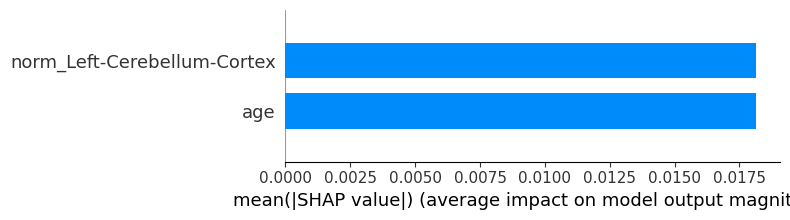

In [57]:

fold_id = 2
shap.summary_plot(
    shap_values_per_fold_rf[fold_id],
    features=None,
    feature_names=feature_names_rf,
    plot_type="bar",
    max_display=20,
    show=True
)


/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 22.79it/s]
/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 27.78it/s]
/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 30.42it/s]
/home/barsha/envs/jupyter/lib/python3.10/site-packages/sklearn/utils/v

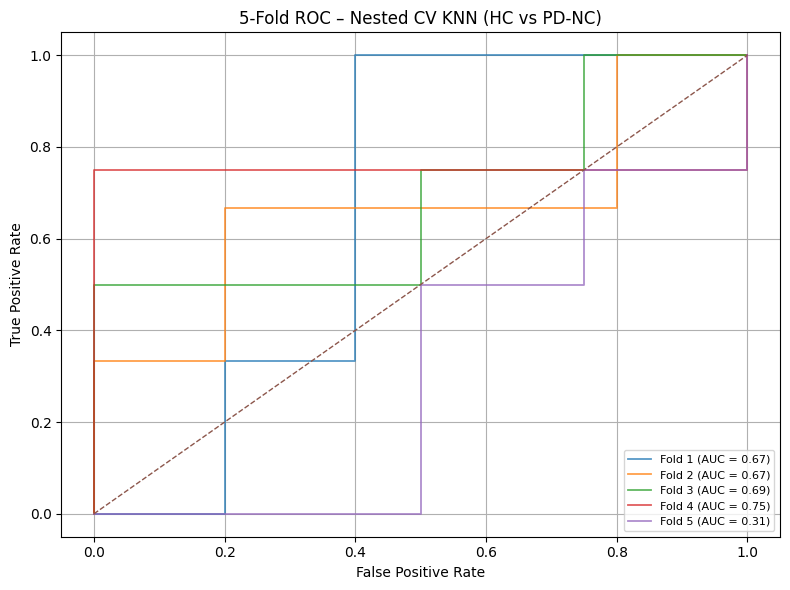

KNN Mean AUC: 0.617 ± 0.155


In [58]:
                                               ############### KNN #######################

pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("select", SelectKBest(score_func=f_classif)),
    ("clf", KNeighborsClassifier())
])


param_grid = {
    "select__k": [5, 10, 15, 20],          # NOT 30
    "clf__n_neighbors": [5, 7, 9, 11],    # stable for small datasets
    "clf__weights": ["distance"],         # mandatory
    "clf__metric": ["euclidean", "manhattan"]
}


plt.figure(figsize=(8, 6))

aucs_knn = []

# ⚠️ Use 5-fold outer CV for small N
outer_cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

inner_cv = StratifiedKFold(
    n_splits=3,
    shuffle=True,
    random_state=42
)
selected_k = []

shap_values_per_fold_knn = []
feature_names_per_fold_knn = []
X_train_sel_per_fold_knn = []


for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    grid = GridSearchCV(
        estimator=clone(pipe_knn),
        param_grid=param_grid,
        cv=inner_cv,
        scoring="roc_auc",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)
    best_knn = grid.best_estimator_
    
    # Extract trained components (FIXED)
    selector = best_knn.named_steps["select"]
    knn_model = best_knn.named_steps["clf"]
    
    # Transform training data
    X_train_sel = selector.transform(X_train)
    X_train_sel_per_fold_knn.append(X_train_sel)
    
    # Selected feature names
    selected_features = X.columns[selector.get_support()]
    feature_names_per_fold_knn.append(selected_features)
    
    # 🔹 Background for SHAP (small subset for stability)
    background = shap.sample(X_train_sel, min(10, X_train_sel.shape[0]), random_state=42)
    
    # 🔹 Model-agnostic SHAP explainer (CORRECT for KNN)
    explainer = shap.KernelExplainer(
        knn_model.predict_proba,
        background
    )
    
    # 🔹 Explain a small subset
    X_explain = X_train_sel[:min(15, X_train_sel.shape[0])]
    
    # SHAP values for positive class (PD)
    shap_vals = explainer.shap_values(X_explain)[1]
    
    # 🔹 Convert to GLOBAL importance (required for bar plot)
    shap_vals_mean = np.mean(np.abs(shap_vals), axis=0)
    
    shap_values_per_fold_knn.append(shap_vals_mean)
  

    y_prob = best_knn.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    # inside outer CV loop
    selected_k.append(grid.best_params_["select__k"])
    
    aucs_knn.append(auc)

    plt.plot(
        fpr, tpr,
        lw=1.3,
        alpha=0.75,
        label=f"Fold {fold} (AUC = {auc:.2f})"
    )

# Chance line
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("5-Fold ROC – Nested CV KNN (HC vs PD-NC)")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"KNN Mean AUC: {np.mean(aucs_knn):.3f} ± {np.std(aucs_knn):.3f}")




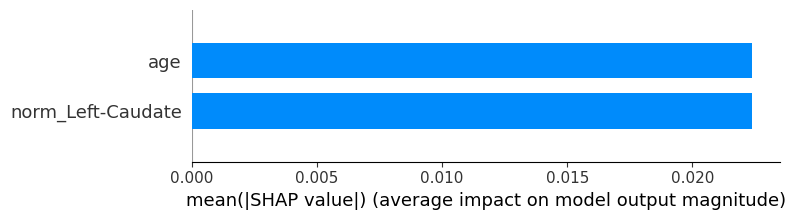

In [59]:
fold_id = 0

shap.summary_plot(
    shap_values_per_fold_knn[fold_id].reshape(1, -1),
    features=None,
    feature_names=feature_names_per_fold_knn[fold_id],
    plot_type="bar",
    max_display=20,
    show=True
)


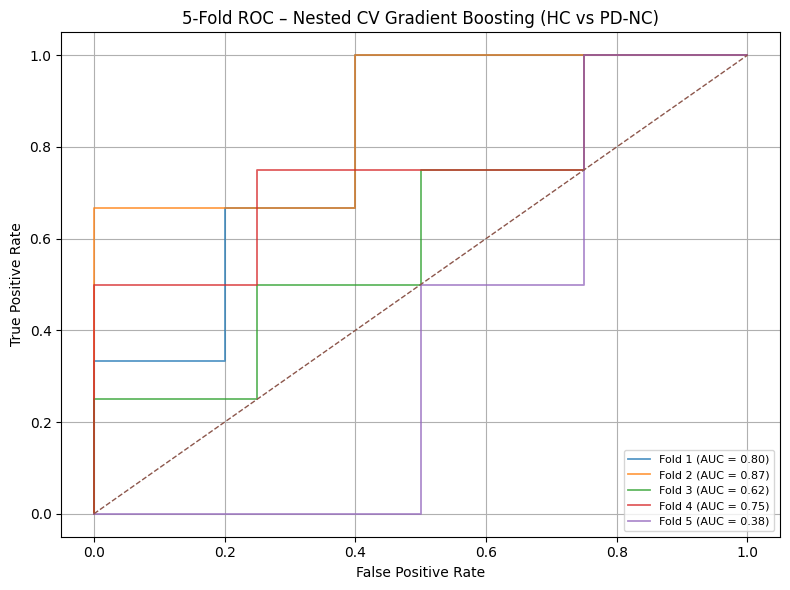

Gradient Boosting Mean AUC: 0.683 ± 0.173


In [62]:
                                                      ########## Gradient Boosting ############


pipe_gb = Pipeline([
    ("select", SelectKBest(score_func=f_classif)),
    ("clf", GradientBoostingClassifier(random_state=42))
])

param_grid = {
    "select__k": [15, 20, 25],     # allow model to decide
    "clf__n_estimators": [100, 200],
    "clf__learning_rate": [0.03, 0.05, 0.1],
    "clf__max_depth": [2],          # shallow trees
    "clf__subsample": [0.7, 0.8]       # regularization
}

plt.figure(figsize=(8, 6))

aucs_gb = []
selected_k = []

outer_cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

inner_cv = StratifiedKFold(
    n_splits=3,
    shuffle=True,
    random_state=42
)

gb_base = GradientBoostingClassifier(random_state=42)


import shap

shap_values_per_fold_GB = []
feature_names_per_fold_GB = []
X_train_sel_per_fold_GB = []

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    grid = GridSearchCV(
        estimator=clone(pipe_gb),
        param_grid=param_grid,
        cv=inner_cv,
        scoring="roc_auc",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)
    best_gb = grid.best_estimator_

    # Extract trained components
    selector = best_gb.named_steps["select"]
    gb_model = best_gb.named_steps["clf"]
    
    # Transform ONLY training data (important!)
    X_train_sel = selector.transform(X_train)
    X_train_sel_per_fold_GB.append(X_train_sel)

    
    # Get selected feature names (for labeling only)
    selected_features = X.columns[selector.get_support()]
    
    # SHAP explainer
    explainer = shap.TreeExplainer(gb_model)
    shap_vals = explainer.shap_values(X_train_sel)
    
    # Store
    shap_values_per_fold_GB.append(shap_vals)
    feature_names_per_fold_GB.append(selected_features)

    y_prob = best_gb.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    aucs_gb.append(auc)
    selected_k.append(grid.best_params_["select__k"])

    plt.plot(
        fpr, tpr,
        lw=1.3,
        alpha=0.75,
        label=f"Fold {fold} (AUC = {auc:.2f})"
    )

plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("5-Fold ROC – Nested CV Gradient Boosting (HC vs PD-NC)")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Gradient Boosting Mean AUC: {np.mean(aucs_gb):.3f} ± {np.std(aucs_gb):.3f}")


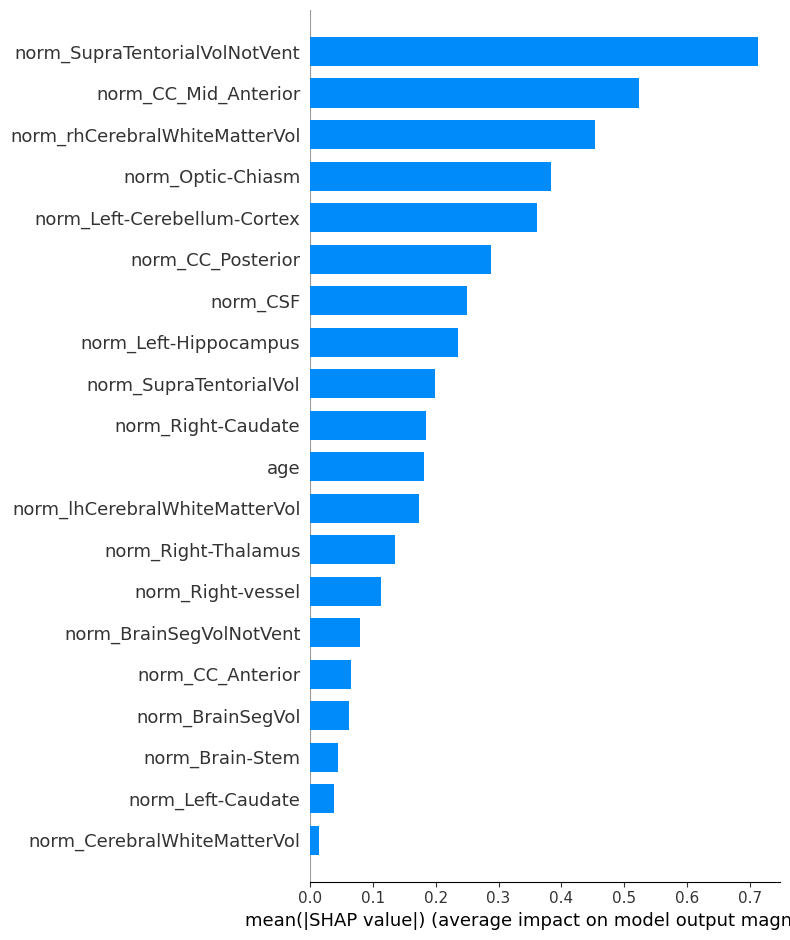

In [63]:
fold_id = 1  # first fold

shap.summary_plot(
    shap_values_per_fold_GB[fold_id],
    features=None,
    feature_names=feature_names_per_fold_GB[fold_id],
    plot_type="bar"
)


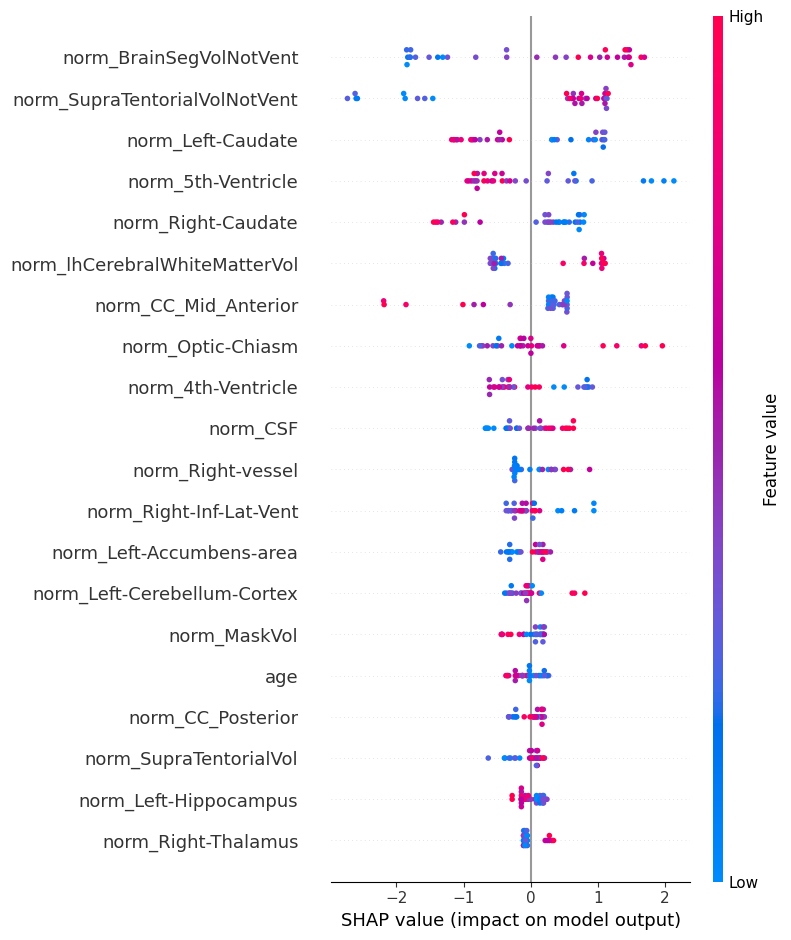

In [64]:
fold_id = 0  # choose the fold you want to visualize

shap.summary_plot(
    shap_values_per_fold_GB[fold_id],
    X_train_sel_per_fold_GB[fold_id],
    feature_names=feature_names_per_fold_GB[fold_id],
    max_display=20,      # match your screenshot
    plot_type="dot",     # default beeswarm
    show=True
)


100%|███████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 77.34it/s]


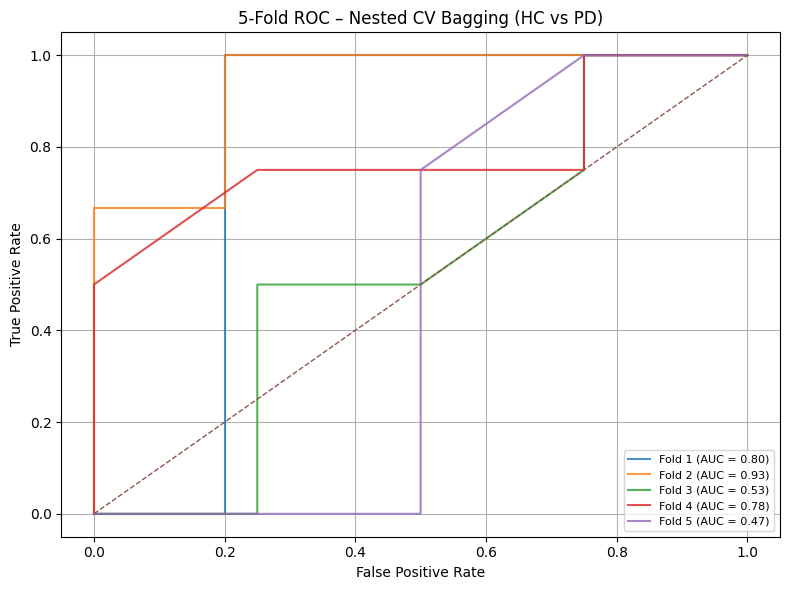

Bagging Mean AUC: 0.703 ± 0.175


In [65]:
# Bagging

plt.figure(figsize=(8, 6))

aucs_bagging = []

outer_cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

inner_cv = StratifiedKFold(
    n_splits=3,
    shuffle=True,
    random_state=42
)

bag_base = BaggingClassifier(
    random_state=42
)

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_samples": [0.7, 0.8, 1.0],
    "max_features": [0.7, 0.8, 1.0]
}

# SHAP storage
shap_values_per_fold_bag = []
X_train_per_fold_bag = []
feature_names_bag = X.columns

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # 🔁 Inner CV (hyperparameter tuning)
    grid = GridSearchCV(
        estimator=clone(bag_base),
        param_grid=param_grid,
        cv=inner_cv,
        scoring="roc_auc",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)
    best_bag = grid.best_estimator_

    # 🔍 Test fold evaluation
    y_prob = best_bag.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    aucs_bagging.append(auc)

    plt.plot(
        fpr, tpr,
        lw=1.5,
        alpha=0.8,
        label=f"Fold {fold} (AUC = {auc:.2f})"
    )

    # ---------------- SHAP (training data only) ----------------
    # Use small background set (important for KernelExplainer)
    background = shap.sample(X_train, 50, random_state=42)

    explainer = shap.KernelExplainer(
        best_bag.predict_proba,
        background
    )

    shap_vals = explainer.shap_values(X_train, nsamples=100)

    shap_values_per_fold_bag.append(shap_vals)
    X_train_per_fold_bag.append(X_train)

# Chance line
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("5-Fold ROC – Nested CV Bagging (HC vs PD)")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Bagging Mean AUC: {np.mean(aucs_bagging):.3f} ± {np.std(aucs_bagging):.3f}")


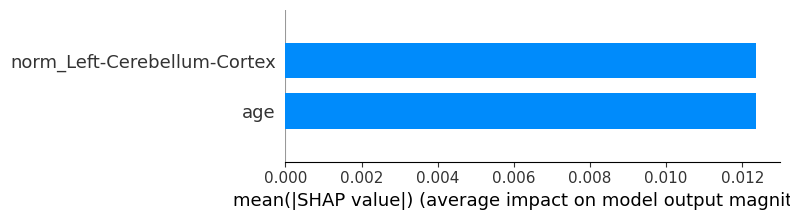

In [68]:
fold_id = 0

# Take SHAP values for PD class
shap_vals = shap_values_per_fold_bag[fold_id][1]

# 🚫 DO NOT pass X here
shap.summary_plot(
    shap_vals,
    features=None,
    feature_names=feature_names_bag,
    plot_type="bar",
    max_display=20,
    show=True
)


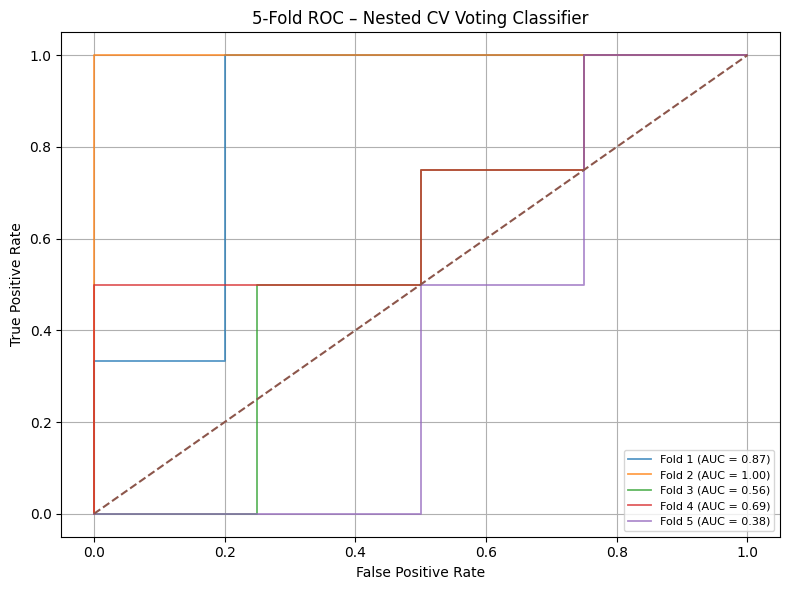

Voting Mean AUC: 0.698 ± 0.220


In [70]:
# Voting Classifier

plt.figure(figsize=(8, 6))

aucs_vote = []

outer_cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

inner_cv = StratifiedKFold(
    n_splits=3,
    shuffle=True,
    random_state=42
)

# (Optional) tune only RF inside voting
param_grid = {
    "rf__max_depth": [None, 5, 10],
    "rf__n_estimators": [100, 200]
}

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    grid = GridSearchCV(
        estimator=clone(voting_clf),
        param_grid=param_grid,
        cv=inner_cv,
        scoring="roc_auc",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)
    best_vote = grid.best_estimator_

    y_prob = best_vote.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    aucs_vote.append(auc)

    plt.plot(
        fpr, tpr,
        lw=1.3,
        alpha=0.75,
        label=f"Fold {fold} (AUC = {auc:.2f})"
    )

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("5-Fold ROC – Nested CV Voting Classifier")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Voting Mean AUC: {np.mean(aucs_vote):.3f} ± {np.std(aucs_vote):.3f}")
